## Paso 1: Instalar dependencias

In [1]:
!pip install tensorflow tensorflow-datasets matplotlib opencv-python pillow

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Paso 2: Importar librerías

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image

## Paso 3: Descargar dataset de perros y gatos

### ⚠️ SOLUCIÓN ALTERNATIVA si hay problemas con el dataset

Si el paso anterior falla, puedes usar esta solución alternativa más simple:

In [3]:
# ...existing code...
# Reemplaza la celda que carga PetImages por esta (limitar a 50 por clase)
print("🔄 Cargando imágenes desde carpetas locales PetImages (máx 50 por clase)...")

datos_raw = []
carpetas = [
    ('PetImages/Cat', 0),  # Gatos = 0
    ('PetImages/Dog', 1)   # Perros = 1
]

MAX_POR_CLASE = 50

for carpeta, etiqueta in carpetas:
    if not os.path.exists(carpeta):
        print(f"⚠️ No se encontró la carpeta: {carpeta}")
        continue

    archivos = [f for f in os.listdir(carpeta)
                if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

    print(f"\n📁 {carpeta}: {len(archivos)} imágenes encontradas")

    contador = 0
    for archivo in archivos:
        if contador >= MAX_POR_CLASE:
            break

        try:
            ruta = os.path.join(carpeta, archivo)
            img = cv2.imread(ruta)

            if img is None:
                continue

            datos_raw.append((img, etiqueta))
            contador += 1

            if contador % 10 == 0:
                print(f"  ✓ Cargadas {contador} imágenes...")

        except:
            continue

    print(f"  Total de {carpeta}: {contador}")

print(f"\n✅ TOTAL CARGADO: {len(datos_raw)} imágenes")
gatos = sum(1 for _, label in datos_raw if label == 0)
perros = sum(1 for _, label in datos_raw if label == 1)
print(f"   • Gatos: {gatos}")
print(f"   • Perros: {perros}")
# ...existing code...
      

🔄 Cargando imágenes desde carpetas locales PetImages (máx 50 por clase)...

📁 PetImages/Cat: 12500 imágenes encontradas
  ✓ Cargadas 10 imágenes...
  ✓ Cargadas 20 imágenes...
  ✓ Cargadas 30 imágenes...
  ✓ Cargadas 40 imágenes...
  ✓ Cargadas 50 imágenes...
  Total de PetImages/Cat: 50

📁 PetImages/Dog: 12500 imágenes encontradas
  ✓ Cargadas 10 imágenes...
  ✓ Cargadas 20 imágenes...
  ✓ Cargadas 30 imágenes...
  ✓ Cargadas 40 imágenes...
  ✓ Cargadas 50 imágenes...
  Total de PetImages/Dog: 50

✅ TOTAL CARGADO: 100 imágenes
   • Gatos: 50
   • Perros: 50


## Paso 4: IMPORTANTE - Crear carpeta con tus fotos

**INSTRUCCIONES:**
1. Crea una carpeta llamada `mis_fotos` en la misma ubicación que este notebook
2. Agrega al menos 50-100 fotos tuyas (diferentes ángulos, iluminación, fondos)
3. Las fotos pueden ser JPG, PNG, etc.
4. Pueden ser selfies, fotos de tu cara en diferentes situaciones

Ruta esperada: `clasificador-perros-gatos-main/mis_fotos/`

In [4]:
# Definir el tamaño de imagen
TAMANO_IMG = 100

# Verificar que existe la carpeta con tus fotos
CARPETA_MIS_FOTOS = 'mis_fotos'

if not os.path.exists(CARPETA_MIS_FOTOS):
    print(f"⚠️ ERROR: No existe la carpeta '{CARPETA_MIS_FOTOS}'")
    print(f"Por favor, crea la carpeta y agrega tus fotos allí.")
else:
    num_fotos = len([f for f in os.listdir(CARPETA_MIS_FOTOS) 
                     if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))])
    print(f"✓ Carpeta encontrada con {num_fotos} fotos")
    if num_fotos < 50:
        print(f"⚠️ ADVERTENCIA: Se recomienda al menos 50 fotos. Tienes {num_fotos}")

✓ Carpeta encontrada con 51 fotos


## Paso 5: Cargar y procesar tus fotos

In [5]:
def cargar_mis_fotos(carpeta, tamano_img=100):
    """Carga y procesa las fotos de la carpeta especificada"""
    imagenes = []
    extensiones_validas = ('.png', '.jpg', '.jpeg', '.bmp', '.gif')
    
    archivos = [f for f in os.listdir(carpeta) if f.lower().endswith(extensiones_validas)]
    
    # Limitar a 50 imágenes para balancear con gatos y perros
    archivos = archivos[:50]
    
    print(f"Procesando {len(archivos)} imágenes...")
    
    for i, archivo in enumerate(archivos):
        try:
            ruta = os.path.join(carpeta, archivo)
            # Leer imagen
            imagen = cv2.imread(ruta)
            if imagen is None:
                print(f"⚠️ No se pudo leer: {archivo}")
                continue
            
            # Redimensionar
            imagen = cv2.resize(imagen, (tamano_img, tamano_img))
            # Convertir a escala de grises
            imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
            # Reshape para el formato del modelo
            imagen = imagen.reshape(tamano_img, tamano_img, 1)
            
            imagenes.append(imagen)
            
            if (i + 1) % 20 == 0:
                print(f"  Procesadas {i + 1}/{len(archivos)}")
        except Exception as e:
            print(f"⚠️ Error al procesar {archivo}: {e}")
    
    print(f"✓ Total procesadas: {len(imagenes)}")
    return np.array(imagenes)

# Cargar tus fotos
mis_imagenes = cargar_mis_fotos(CARPETA_MIS_FOTOS, TAMANO_IMG)
print(f"\nShape de tus imágenes: {mis_imagenes.shape}")

Procesando 50 imágenes...
  Procesadas 20/50
  Procesadas 40/50
✓ Total procesadas: 50

Shape de tus imágenes: (50, 100, 100, 1)


## Paso 6: Visualizar algunas de tus fotos procesadas

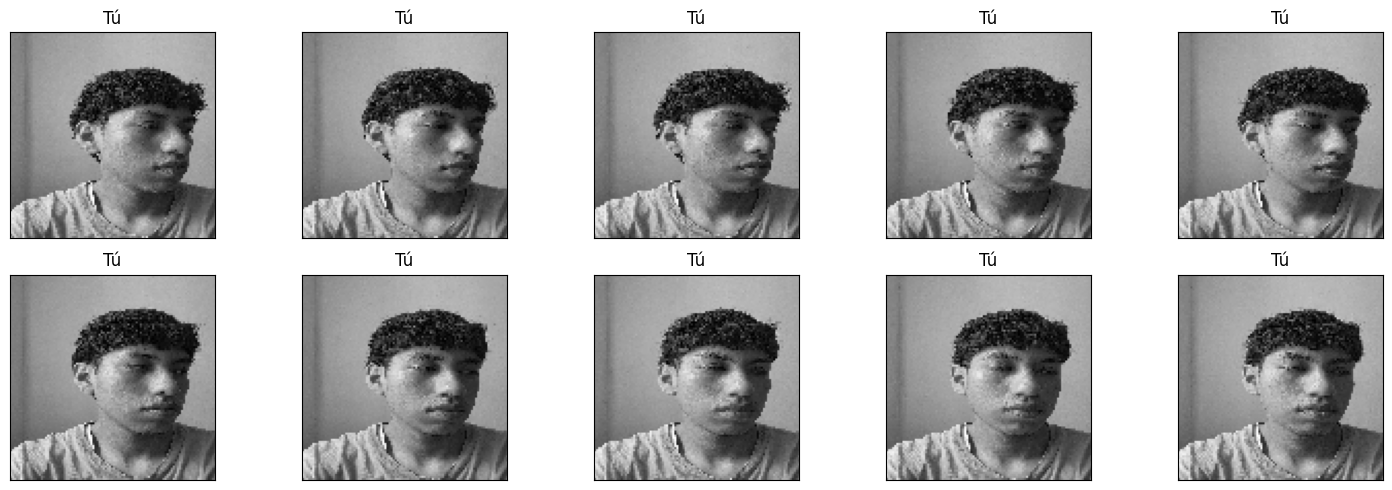

In [6]:
# Mostrar algunas de tus fotos procesadas
plt.figure(figsize=(15, 5))
num_mostrar = min(10, len(mis_imagenes))
for i in range(num_mostrar):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(mis_imagenes[i].reshape(TAMANO_IMG, TAMANO_IMG), cmap='gray')
    plt.title("Tú")
plt.tight_layout()
plt.show()

## Paso 7: Procesar dataset de perros y gatos

In [7]:
# Procesar todas las imágenes del dataset
datos_entrenamiento = []

print("Procesando imágenes de perros y gatos...")
# Si existe 'datos' (TFDS), lo usamos; si no, usamos 'datos_raw' (PetImages locales)
if 'datos' in globals():
    try:
        for i, (imagen, etiqueta) in enumerate(datos['train']):
            # Redimensionar y convertir a escala de grises
            img_np = imagen.numpy()
            img_res = cv2.resize(img_np, (TAMANO_IMG, TAMANO_IMG))
            img_gray = cv2.cvtColor(img_res, cv2.COLOR_BGR2GRAY)
            img_gray = img_gray.reshape(TAMANO_IMG, TAMANO_IMG, 1)

            # Guardar imagen con su etiqueta original (0=gato, 1=perro)
            datos_entrenamiento.append([img_gray, etiqueta.numpy()])

            if (i + 1) % 2000 == 0:
                print(f"  Procesadas {i + 1} imágenes...")
    except Exception as e:
        print("⚠️ Error procesando 'datos' (TFDS):", e)
else:
    # Usar datos_raw (cargado desde PetImages locales)
    if 'datos_raw' not in globals() or len(datos_raw) == 0:
        print("⚠️ No hay imágenes en 'datos_raw'. Asegúrate de ejecutar la celda que carga PetImages.")
    else:
        for i, (img, etiqueta) in enumerate(datos_raw):
            try:
                img_res = cv2.resize(img, (TAMANO_IMG, TAMANO_IMG))
                img_gray = cv2.cvtColor(img_res, cv2.COLOR_BGR2GRAY)
                img_gray = img_gray.reshape(TAMANO_IMG, TAMANO_IMG, 1)
                datos_entrenamiento.append([img_gray, etiqueta])
                if (i + 1) % 2000 == 0:
                    print(f"  Procesadas {i + 1} imágenes...")
            except Exception:
                continue

print(f"✓ Total de perros y gatos: {len(datos_entrenamiento)}")

Procesando imágenes de perros y gatos...
✓ Total de perros y gatos: 100


## Paso 8: Combinar todos los datos (gatos, perros y tú)

In [8]:
# Agregar tus fotos al dataset con etiqueta 2
for imagen in mis_imagenes:
    datos_entrenamiento.append([imagen, 2])  # Etiqueta 2 = Tú

print(f"Total de imágenes en el dataset combinado: {len(datos_entrenamiento)}")

# Mezclar los datos aleatoriamente
np.random.shuffle(datos_entrenamiento)
print("✓ Datos mezclados aleatoriamente")

Total de imágenes en el dataset combinado: 150
✓ Datos mezclados aleatoriamente


## Paso 9: Separar imágenes y etiquetas

In [9]:
# Preparar variables X (entradas) y y (etiquetas)
X = []
y = []

for imagen, etiqueta in datos_entrenamiento:
    X.append(imagen)
    y.append(etiqueta)

# Convertir a arrays numpy
X = np.array(X).astype(float) / 255  # Normalizar
y = np.array(y)

print(f"Shape de X: {X.shape}")
print(f"Shape de y: {y.shape}")
print(f"\nDistribución de clases:")
print(f"  Gatos (0): {np.sum(y == 0)}")
print(f"  Perros (1): {np.sum(y == 1)}")
print(f"  Andy (2): {np.sum(y == 2)}")

Shape de X: (150, 100, 100, 1)
Shape de y: (150,)

Distribución de clases:
  Gatos (0): 50
  Perros (1): 50
  Andy (2): 50


## Paso 10: Visualizar ejemplos de las 3 clases

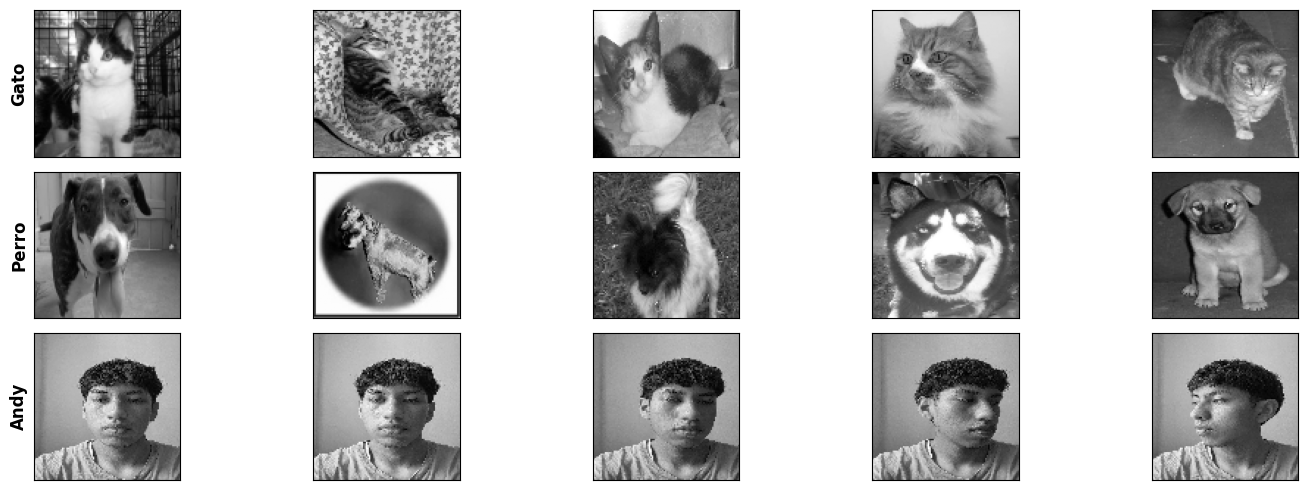

In [10]:
# Mostrar ejemplos de cada clase
plt.figure(figsize=(15, 5))
clases = ['Gato', 'Perro', 'Andy']

for clase_idx in range(3):
    # Encontrar índices de esta clase
    indices = np.where(y == clase_idx)[0][:5]
    
    for i, idx in enumerate(indices):
        plt.subplot(3, 5, clase_idx * 5 + i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(X[idx].reshape(TAMANO_IMG, TAMANO_IMG), cmap='gray')
        if i == 0:
            plt.ylabel(clases[clase_idx], fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## Paso 11: Crear el modelo CNN para 3 clases

In [21]:
# Modelo CNN para 3 clases
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 clases con softmax
])

# Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Para múltiples clases
    metrics=['accuracy']
)

modelo.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 250)            │     3,200,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           753 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,293,675 (12.56 MB)

 Trainable params: 3,293,675 (12.56 MB)

 Non-trainable params: 0 (0.00 B)

## Paso 12: Entrenar el modelo

In [22]:
# Instalar scipy para asegurar que ImageDataGenerator funcione
!pip install scipy

# Entrenar el modelo con Data Augmentation y Early Stopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Dividir datos manualmente (ya están mezclados)
split_idx = int(len(X) * 0.85)
X_train, X_val = X[:split_idx], X[split_idx:]
y_train, y_val = y[:split_idx], y[split_idx:]

# Configurar Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

# Configurar Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Entrenar
history = modelo.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[early_stopping],
    verbose=1
)

ImportError: This requires the scipy module. You can install it via `pip install scipy`

## Paso 13: Visualizar el entrenamiento

In [ ]:
# Graficar accuracy y loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Paso 14: Probar el modelo con ejemplos aleatorios

In [ ]:
# Probar con imágenes aleatorias
clases_nombres = ['Gato', 'Perro', 'Tú']
indices_prueba = np.random.choice(len(X), 12, replace=False)

plt.figure(figsize=(15, 8))
for i, idx in enumerate(indices_prueba):
    # Hacer predicción
    imagen_test = X[idx].reshape(1, 100, 100, 1)
    prediccion = modelo.predict(imagen_test, verbose=0)
    clase_predicha = np.argmax(prediccion)
    confianza = prediccion[0][clase_predicha] * 100
    
    # Mostrar imagen
    plt.subplot(3, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X[idx].reshape(TAMANO_IMG, TAMANO_IMG), cmap='gray')
    
    # Color verde si es correcto, rojo si no
    color = 'green' if clase_predicha == y[idx] else 'red'
    plt.title(f"Real: {clases_nombres[y[idx]]}\nPred: {clases_nombres[clase_predicha]} ({confianza:.1f}%)",
              color=color, fontsize=9)

plt.tight_layout()
plt.show()

## Paso 15: Guardar el modelo

In [ ]:
# Guardar el modelo entrenado
modelo.save('clasificador_personalizado.h5')
print("✓ Modelo guardado como 'clasificador_personalizado.h5'")

## Paso 16: Convertir a TensorFlow.js (opcional)

In [ ]:
# Instalar tensorflowjs
!pip install tensorflowjs

In [ ]:
import os
os.makedirs('modelo_web', exist_ok=True)
# Usar comando de sistema para evitar errores de importación de tensorflow_hub
!tensorflowjs_converter --input_format keras clasificador_personalizado.h5 modelo_web
print("✓ modelo_web creado (si no hubo errores arriba)")

## Paso 17: Función para probar con una imagen nueva

In [ ]:
def predecir_imagen(ruta_imagen):
    """Predice la clase de una imagen desde un archivo"""
    # Leer y procesar imagen
    imagen = cv2.imread(ruta_imagen)
    imagen = cv2.resize(imagen, (TAMANO_IMG, TAMANO_IMG))
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    imagen = imagen.reshape(1, TAMANO_IMG, TAMANO_IMG, 1)
    imagen = imagen.astype(float) / 255
    
    # Hacer predicción
    prediccion = modelo.predict(imagen, verbose=0)
    clase = np.argmax(prediccion)
    confianza = prediccion[0][clase] * 100
    
    clases_nombres = ['Gato', 'Perro', 'Tú']
    
    print(f"\nPredicción: {clases_nombres[clase]}")
    print(f"Confianza: {confianza:.2f}%")
    print(f"\nProbabilidades:")
    for i, prob in enumerate(prediccion[0]):
        print(f"  {clases_nombres[i]}: {prob*100:.2f}%")
    
    # Mostrar imagen
    img_mostrar = cv2.imread(ruta_imagen)
    img_mostrar = cv2.cvtColor(img_mostrar, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6, 6))
    plt.imshow(img_mostrar)
    plt.title(f"Predicción: {clases_nombres[clase]} ({confianza:.1f}%)")
    plt.axis('off')
    plt.show()

# Ejemplo de uso (descomenta y cambia la ruta):
# predecir_imagen('mis_fotos/foto1.jpg')